In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
test=pd.read_csv('C:/Users/sumit_000/Desktop/numpy/test.csv')
train=pd.read_csv('C:/Users/sumit_000/Desktop/numpy/train.csv')
data=pd.concat([train,test])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
features = {}
nullValues = []
for i in data:
    if (data.isna().sum()[i])>0 and i!='SalePrice':
        features[i]=data.isna().sum()[i]
        nullValues.append(data.isna().sum()[i])

In [4]:
features

{'MSZoning': 4,
 'LotFrontage': 486,
 'Alley': 2721,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 24,
 'MasVnrArea': 23,
 'BsmtQual': 81,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinType1': 79,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 80,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'Electrical': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 1420,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'GarageFinish': 159,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 159,
 'GarageCond': 159,
 'PoolQC': 2909,
 'Fence': 2348,
 'MiscFeature': 2814,
 'SaleType': 1}

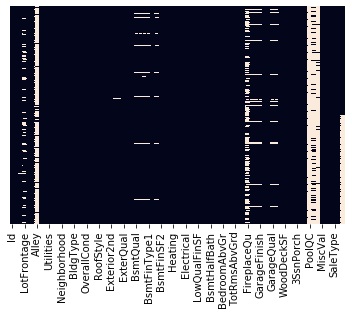

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [6]:
data = data.dropna(axis=1, how='any', thresh = 1000) 

In [7]:

for i in data:
    if (data.isna().sum()[i])>0 and i!='SalePrice':
        if data[i].dtype=='object':
         data[i]=data[i].fillna(data[i].mode()[0])
        else:
         data[i]=data[i].fillna(data[i].mean())

         
            

C:\Users\sumit_000\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sumit_000\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


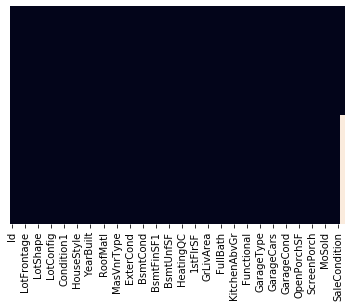

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [9]:
data=pd.get_dummies(data,drop_first=True)
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
drop_features=[]
for i in np.arange(len(listOfFeatures)):
 for j in np.arange(i+1,len(listOfFeatures)):
    feature1=listOfFeatures[i]
    feature2=listOfFeatures[j]
    if abs(covarianceMatrix[feature1][feature2]) >= 0.9:
        drop_features.append(feature1)
    


In [11]:
data.drop(drop_features,axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

data = data.drop(nonCorrelatedWithOutput, axis=1)

In [13]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,0,1,0,1,0,1,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,0,1,0,1,0,1,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,0,1,0,1,0,1,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,0,1,0,1,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,1,0,1,0,1,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,...,0,1,0,1,0,1,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,1,0,1,0,1,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,...,0,1,0,1,0,1,0,0,1,0


In [14]:
#Dealing with outliers

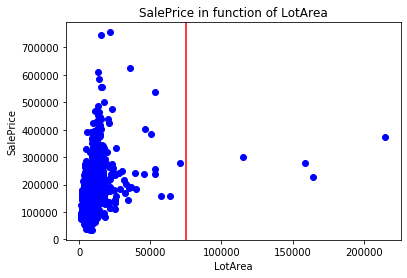

In [15]:
#Plot one of the features with outliers

plt.plot(data['LotArea'], data['SalePrice'],'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

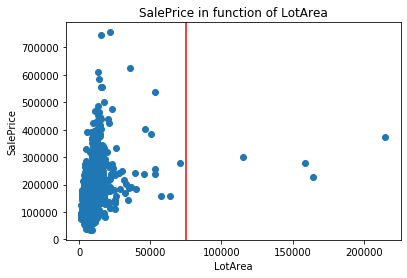

In [16]:
#Plot one of the features with outliers

plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

In [17]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)

newTrain = data.iloc[:1460]
newTest = data.iloc[1460:]

#Second, we will define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = newTrain.drop(outlierValuesList) #Drop outlier rows
    


In [18]:
trainWithoutOutliers

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,0,1,0,1,0,1,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,0,1,0,1,0,1,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,0,1,0,1,0,1,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,0,1,0,1,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,...,0,1,0,1,0,1,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,...,0,1,0,1,0,1,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,...,0,1,0,1,0,1,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,...,0,1,0,1,0,1,0,0,1,0


# linear regression

In [19]:
#Train the data

In [20]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

In [21]:
#Make & Submit prediction

In [22]:
newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column
pred = np.expm1(reg.predict(newTest))

#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission2.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,116677.384764
1,1462,150547.093036
2,1463,181165.690998
3,1464,199302.265850
4,1465,190103.398546
...,...,...
1454,2915,84997.023987
1455,2916,81309.376777
1456,2917,165727.344872
1457,2918,117787.551148


In [23]:
#my_score is 0.14536

# xgboost 

In [24]:
import xgboost
regressor=xgboost.XGBRegressor()

In [25]:
## Hyper Parameter Optimization
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [26]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [27]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  9.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [28]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
regressor.fit(X,Y)


[16:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:

pred = np.expm1(regressor.predict(newTest))

#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission3.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,118819.414062
1,1462,164962.296875
2,1463,190016.593750
3,1464,193828.296875
4,1465,174154.562500
...,...,...
1454,2915,79244.726562
1455,2916,71617.968750
1456,2917,160757.953125
1457,2918,115868.757812


# lasso regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\sumit_000\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.50916437258371, tolerance: 0.01569877993070245
  positive)
C:\Users\sumit_000\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.247182495692638, tolerance: 0.014713905367920674
  positive)
C:\Users\sumit_000\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.210003631594024, tolerance: 0.015342906313458426
  positive)
C:\Users\sumit_000\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number o

{'alpha': 0.001}
-0.013012838403955743


In [33]:
lasso=Lasso(alpha=0.001)


In [34]:
lasso.fit(X,Y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:

pred = np.expm1(lasso.predict(newTest))

#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission4.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,114686.388501
1,1462,156081.553711
2,1463,180554.494035
3,1464,201299.851614
4,1465,184810.897027
...,...,...
1454,2915,93887.652023
1455,2916,86751.753659
1456,2917,171423.505534
1457,2918,119411.871371


# avg of xgboost and lasso regression

In [36]:
df3=pd.read_csv('submission3.csv')
df4=pd.read_csv('submission4.csv')

In [37]:

df5=(df3['SalePrice']+df4['SalePrice'])/2

In [38]:


#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = df5
sub.to_csv("submission5.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,116752.901250
1,1462,160521.926855
2,1463,185285.547017
3,1464,197564.075807
4,1465,179482.728514
...,...,...
1454,2915,86566.191011
1455,2916,79184.861829
1456,2917,166090.727767
1457,2918,117640.315686


In [42]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)

newTrain = data.iloc[:1460]
newTest = data.iloc[1460:]

#Second, we will define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0])                                
    print(outliers_iqr(newTrain[column]))
    trainWithoutOutliers=newTrain.drop(outlierValuesList)                                
                                     
                                
    

(array([   9,   48,   56,   75,   87,   93,  115,  125,  145,  165,  172,
        180,  193,  195,  225,  227,  232,  235,  243,  246,  285,  291,
        300,  312,  335,  344,  348,  363,  411,  430,  432,  434,  472,
        488,  489,  490,  500,  504,  520,  535,  578,  599,  603,  614,
        623,  635,  637,  649,  655,  675,  685,  687,  703,  705,  713,
        755,  758,  829,  831,  837,  861,  914,  915,  956,  959,  962,
        969,  971,  975,  985, 1007, 1029, 1030, 1038, 1039, 1062, 1068,
       1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219,
       1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378,
       1393, 1416, 1449, 1452], dtype=int64),)
(array([  25,   35,   36,   41,   52,   56,   75,   85,   86,  145,  150,
        159,  161,  171,  193,  195,  197,  225,  227,  231,  232,  235,
        260,  264,  276,  277,  290,  302,  306,  313,  320,  363,  408,
        429,  430,  432,  434,  446,  473,  489,  500,  504,  523,  599,
  

       1405, 1408, 1414, 1420, 1421, 1443], dtype=int64),)
(array([ 197,  810, 1170, 1182, 1298, 1386, 1423], dtype=int64),)
(array([], dtype=int64),)
(array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437], dtype=int64),)
(array([  47,   56,   87,  105,  115,  158,  180,  212,  240,  256,  270,
        281,  285,  297,  317,  377,  381,  399,  409,  412,  453,  460,
        501,  507,  525,  549,  578,  603,  623,  641,  644,  650,  686,
        687,  699,  755,  758,  762,  824,  829,  831,  864,  875,  885,
        914,  959,  973,  975,  977,  989, 1087, 1089, 1091, 1172, 1191,
       1217, 1246, 1265, 1317, 1358, 1364, 1365, 1374, 144

        893,  961, 1006, 1044, 1141, 1161, 1271, 1346], dtype=int64),)
(array([  18,   60,  144,  206,  325,  698,  714,  845, 1216, 1238, 1341],
      dtype=int64),)
(array([ 63,  88, 184, 531, 589, 974], dtype=int64),)
(array([583], dtype=int64),)
(array([523, 825], dtype=int64),)
(array([   9,   48,   93,  125,  165,  246,  291,  300,  312,  335,  411,
        488,  520,  535,  635,  637,  703,  705,  713,  821,  861,  969,
        985, 1030, 1062, 1144, 1186, 1190, 1266, 1393, 1416], dtype=int64),)
(array([  17,   39,   52,   78,  102,  137,  144,  188,  330,  342,  420,
        441,  454,  505,  569,  570,  582,  634,  728,  736,  738,  778,
        779,  843,  886,  894,  897,  910,  913,  921,  940,  942,  943,
        954,  955,  984, 1003, 1011, 1090, 1129, 1163, 1216, 1230, 1231,
       1232, 1275, 1283, 1336, 1350, 1391, 1412, 1450], dtype=int64),)
(array([  56,   75,  145,  180,  193,  195,  225,  227,  232,  282,  348,
        363,  430,  434,  483,  489,  500,  599,  631,

(array([], dtype=int64),)
(array([  30,   88,  102,  104,  125,  142,  246,  291,  307,  341,  375,
        386,  398,  410,  488,  533,  609,  636,  657,  694,  705,  969,
       1009, 1048, 1139, 1144, 1285, 1380], dtype=int64),)
(array([  24,   38,   41,   68,   70,   74,   80,   81,   92,   94,   95,
        113,  122,  124,  127,  164,  165,  172,  177,  185,  197,  202,
        206,  218,  241,  254,  265,  269,  275,  288,  299,  311,  323,
        324,  346,  353,  355,  365,  369,  420,  425,  434,  444,  449,
        458,  461,  466,  484,  489,  497,  513,  522,  545,  547,  548,
        582,  586,  592,  599,  601,  606,  607,  615,  632,  654,  659,
        666,  671,  698,  703,  716,  722,  726,  740,  741,  745,  752,
        764,  781,  783,  786,  849,  852,  853,  855,  879,  881,  887,
        888,  890,  901,  920,  924,  935,  939,  946,  952,  960,  961,
        966,  974,  986,  991, 1012, 1032, 1034, 1035, 1063, 1080, 1114,
       1118, 1137, 1141, 1149, 1153, 

      dtype=int64),)
(array([  17,   52,  341,  510,  557,  666, 1163, 1186, 1232], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([   8,   29,   98,  106,  146,  149,  154,  179,  181,  187,  242,
        314,  323,  329,  383,  450,  456,  482,  502,  579,  630,  651,
        676,  677,  788,  809,  848,  907,  986, 1001, 1022, 1034, 1125,
       1132, 1163, 1178, 1186, 1235, 1248, 1328, 1332, 1343, 1376, 1397,
       1399, 1432, 1443, 1448], dtype=int64),)
(array([246, 398, 514], dtype=int64),)
(array([   8,    9,   29,   98,  106,  146,  149,  154,  172,  179,  181,
        185,  187,  242,  246,  268,  290,  314,  323,  329,  383,  398,
        438,  450,  456,  482,  502,  514,  568,  579,  583,  630,  651,
        676,  677,  760,  788,  809,  841,  842,  848,  907,  986, 1001,
       1022, 1034, 1125, 1132, 1159, 1163, 1178, 1186, 1235, 1248, 1281,
       1312, 1328, 1332, 1343, 1346, 1376, 1393, 1397, 1399, 1423, 1432,
     